In [1]:
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/TableS1_HQ_filtered16S.csv")
data.head()

,assembly_accession,CheckM completeness,CheckM contamination,16S_ID,assembly_level,Sum,PKSI,PKSother,NRPS,RiPPs,Saccharides,Terpene,PKS-NRP_Hybrids,Others
0,GCF_000022305.1,100.0,0.67,refseq4905,Complete Genome,3,0,0,0,0,0,1,0,2
1,GCF_000025965.1,100.0,0.37,refseq15376,Complete Genome,7,0,0,0,0,0,1,0,6
2,GCF_000023105.1,100.0,0.84,refseq45559,Complete Genome,1,0,0,0,0,0,1,0,0
3,GCF_000012365.1,100.0,0.06,refseq128457,Complete Genome,20,1,0,5,3,0,2,2,7
4,GCF_000024165.1,100.0,0.88,refseq35003,Complete Genome,8,0,0,2,1,0,1,0,4


In [3]:
# 统计每个值的出现次数
value_counts = data['16S_ID'].value_counts()
# 找到只出现一次的值
values_once = value_counts[value_counts == 1]
values_once_count = values_once.sum()
# 找到出现多次的值
values_multiple = value_counts[value_counts > 1]
values_multiple_count = values_multiple.sum()
values_multiple_deduplicated_count = values_multiple.size
# 输出结果
print("只出现一次的值:", values_once_count)
print("出现多次的值:", values_multiple_count)

只出现一次的值: 42812
出现多次的值: 132509


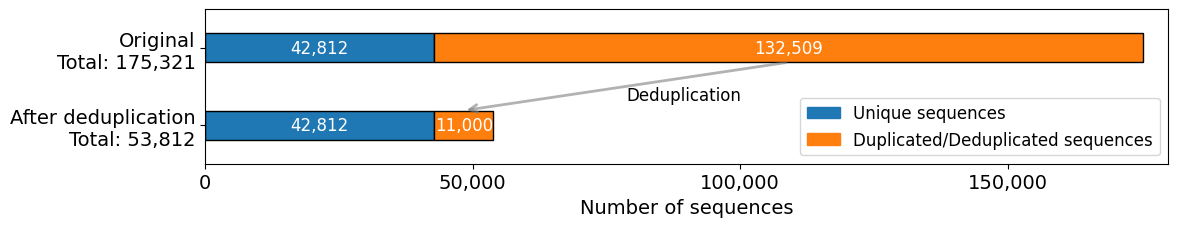

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

# 设置全局字体大小
plt.rcParams.update({'font.size': 14})

# 数据
unique1 = values_once_count
duplicated1 = values_multiple_count
total1 = values_once_count + values_multiple_count

unique2 = values_once_count
deduplicated2 = values_multiple_deduplicated_count
total2 = values_once_count + values_multiple_deduplicated_count

# 颜色设置：蓝色为 Unique，橙色为 Duplicated/Deduplicated
colors = ['#1f77b4', '#ff7f0e']

# 创建画布
fig, ax = plt.subplots(figsize=(12, 2.5))

# 控制柱子高度
bar_height = 0.75  # 调小柱子高度
y1 = 1  # 调整第一行柱子的垂直位置
y2 = -1  # 调整第二行柱子的垂直位置

# 原始数据堆积柱（第一行）
ax.barh(y1, unique1, color=colors[0], edgecolor='black', height=bar_height)
ax.barh(y1, duplicated1, left=unique1, color=colors[1], edgecolor='black', height=bar_height)

# 去重后数据堆积柱（第二行）
ax.barh(y2, unique2, color=colors[0], edgecolor='black', height=bar_height)
ax.barh(y2, deduplicated2, left=unique2, color=colors[1], edgecolor='black', height=bar_height)

# 映射箭头（表示 duplicated → deduplicated 的关系）
arrowprops = dict(arrowstyle="->", color="gray", lw=2, alpha=0.6)
# 箭头终点
xy = (unique2 + deduplicated2 / 2, y2 + bar_height / 2)
# 箭头起点
xytext = (unique1 + duplicated1 / 2, y1 - bar_height / 2)
ax.annotate('', xy=xy, xytext=xytext, arrowprops=arrowprops)
# 计算箭头中间位置
mid_x = (xy[0] + xytext[0]) / 2
mid_y = (xy[1] + xytext[1]) / 2

# 在箭头中间添加文字注释
ax.annotate('Deduplication', xy=(mid_x, mid_y), 
            xytext=(0, 0), textcoords='offset points',
            ha='left', va='top', fontsize=12)


# 添加标签文字，并格式化千分位
ax.text(unique1 / 2, y1, f'{unique1:,}', va='center', ha='center', color='white', fontsize=12)
ax.text(unique1 + duplicated1 / 2, y1, f'{duplicated1:,}', va='center', ha='center', color='white', fontsize=12)
ax.text(unique2 / 2, y2, f'{unique2:,}', va='center', ha='center', color='white', fontsize=12)
ax.text(unique2 + deduplicated2 / 2, y2, f'{deduplicated2:,}', va='center', ha='center', color='white', fontsize=12)

# 设置 Y 轴标签
ax.set_yticks([y1, y2])
ax.set_yticklabels(['Original\nTotal: 175,321', 'After deduplication\nTotal: 53,812'])

# 自定义正方形图例
square_patch_unique = mpatches.Patch(color=colors[0], label='Unique sequences')
square_patch_duplicated = mpatches.Patch(color=colors[1], label='Duplicated/Deduplicated sequences')
ax.legend(handles=[square_patch_unique, square_patch_duplicated], loc='lower right', fontsize=12)

# 固定 X 轴范围
x_min = 0
x_max = 180000
ax.set_xlim(x_min, x_max)

# 设置 X 轴刻度位置和格式
xticks = [0, 50000, 100000, 150000]
ax.set_xticks(xticks)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# 设置 X 轴刻度标签格式化
# formatter = ticker.StrMethodFormatter('{x:,.0f}')
# ax.xaxis.set_major_formatter(formatter)

# 旋转 X 轴标签 45 度
# plt.xticks(rotation=45)

# 固定 Y 轴范围
y_min = -2
y_max = 2
ax.set_ylim(y_min, y_max)

# 其他美化设置
ax.set_xlabel('Number of sequences')
# ax.set_title('Stacked Bar Chart of 16S rRNA Genes') 
plt.tight_layout()

plt.savefig("analysis/correlation(Fig3)/BGC_similarity_in_cdhit_cluster/plot/Fig3A.png", dpi=300, bbox_inches="tight")

# 显示图像
plt.show()
    